In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
fraud["income"].unique()
fraud["income"].value_counts()
# dropping the Taxable.Income columns
fraud = fraud.drop(['Taxable.Income'],axis=1)
fraud.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)
fraud.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [6]:
# As i got an error during fitting the data for model building. I performed encoding using the below code.
# The error was "ValueError: could not convert string to float: 'NO'.
#You can't pass str to your model fit() method, so converting data type
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [9]:
fraud.head()

,Undergrad,marital,population,workexp,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [7]:
features = fraud.iloc[:,0:5]
labels = pd.DataFrame(fraud.iloc[:,5])
fraud["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

<AxesSubplot:xlabel='workexp'>

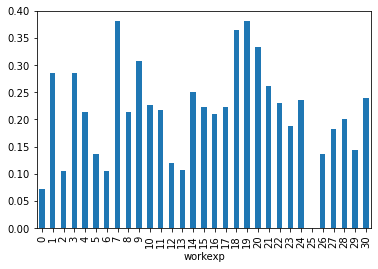

In [11]:
fraud.groupby('workexp').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Undergrad'>

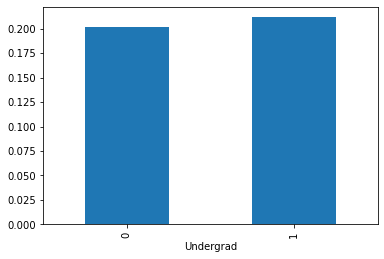

In [12]:
fraud.groupby('Undergrad').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Urban'>

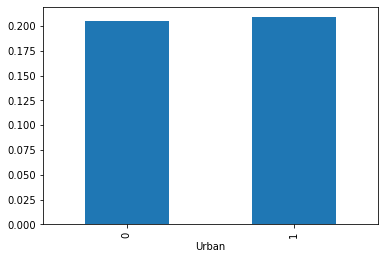

In [13]:
fraud.groupby('Urban').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital'>

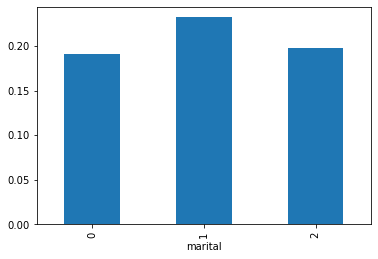

In [15]:
fraud.groupby('marital').income.mean().plot(kind='bar')

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, stratify=labels)

In [8]:
print(y_train["income"].value_counts())
print(y_test["income"].value_counts())

0    333
1     87
Name: income, dtype: int64
0    143
1     37
Name: income, dtype: int64


In [9]:
# We also use pd.factorize to convert the datatype, we  can use the below code.
#fraud["Undergrad"],_ = pd.factorize(fraud["Undergrad"])
#fraud["marital"],_ = pd.factorize(fraud["marital"])
#fraud["Urban"],_ = pd.factorize(fraud["Urban"])
##Converting the column names into the list format
colnames = list(fraud.columns)
predictors = colnames[:5]
target = colnames[5]

In [10]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   marital     600 non-null    int32
 2   population  600 non-null    int64
 3   workexp     600 non-null    int64
 4   Urban       600 non-null    int32
 5   income      600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [11]:
#Splitting the data in train and test data
#One of the way to split the data
#fraud["is_train"] = np.random.uniform(0,1,len(fraud))<=0.70
#fraud["is_train"]
#train,test = fraud[fraud["is_train"]==True],fraud[fraud["is_train"]==False]

In [12]:
from sklearn.tree import DecisionTreeClassifier as DT

In [13]:
model = DT(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

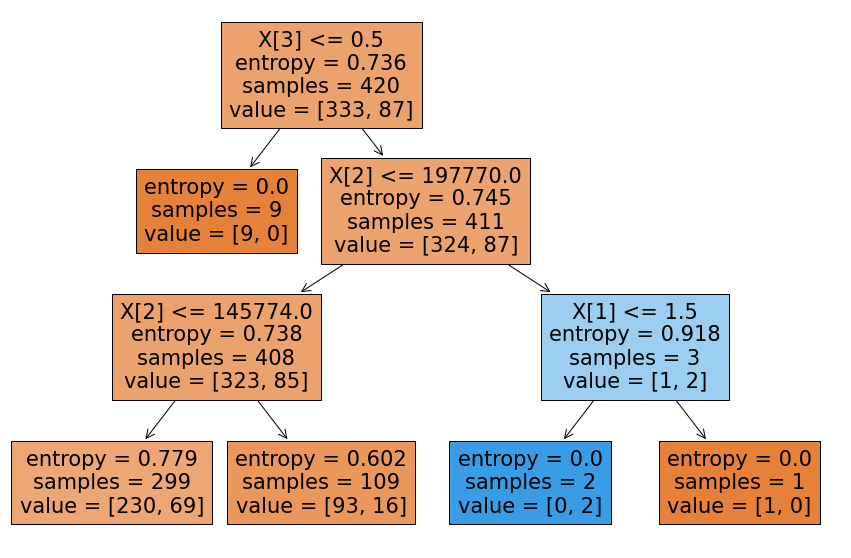

In [18]:
#PLot the decision tree
from sklearn import tree
plt.figure (figsize = (15,10))
tree.plot_tree(model, filled = True);

In [14]:
from sklearn.metrics import accuracy_score
##Prediciton on train data 
pred_train = pd.DataFrame(model.predict(x_train))

In [15]:
# Finding the accuracy of train data
acc_train = accuracy_score(y_train,pred_train) 
print(accuracy_score(y_train,pred_train) )

0.7976190476190477


In [16]:
#Prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))

In [17]:
acc_test = accuracy_score(y_test,pred_test)
print(accuracy_score(y_test,pred_test))

0.7777777777777778
